In [1]:
## DR ONLY


import pandas as pd
import seaborn as sns
import os
import glob as glob
import matplotlib.pyplot as plt


import pickle as pickle
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
from markov_simulator_dynamic_14March23_Jax_deep import Markov_fit
from markov_simulator_dynamic_14March23_Jax_deep import make_extent
ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D54A4"]


In [2]:
results = glob.glob(os.path.join("results/*"))


In [3]:
dfs_ = list()

for r in results:

    files = list(glob.glob(os.path.join(r,"*")))
    files.sort(key=os.path.getmtime, reverse=True)
    d = pd.read_csv(glob.glob(os.path.join(files[0],"results/residuals.csv"))[0]).sort_values("residual")
    d['hyp'] = r.split("/")[1]
    dfs_.append(d)

df = pd.concat(dfs_)

In [4]:
#Trim hypothesis
df = df.loc[~df['hyp'].isin(["Free_1", "Free_2", "Free_3"])]

In [5]:
df_best = list()

for i in df.hyp.unique():
        z = df.loc[df['hyp']==i]
        z.sort_values('residual')
        df_best.append(z[0:1])
        
df_best = pd.concat(df_best)

In [6]:
hypo_ = pd.read_csv("Hypothesis.csv")
hypo_['hyp'] = hypo_['Topology_Name']
#df_best = pd.merge(df_best, hypo, how='left', on='hyp')
hypo = hypo_[['Topology_number', 'hyp','Convergence_dir']]

In [7]:
hypo_['par_num'] = [len(i)*5 for i in hypo_['Transitions'].str.split(',')]

num_params_dict = dict(zip(hypo_['hyp'], hypo_['par_num']))

In [8]:
def calculate_aic(rss, num_params, num_observations):
    """
    Calculate AIC based on residual sum of squares (RSS), number of parameters, and number of observations.
    
    :param rss: Residual Sum of Squares (RSS) for the model
    :param num_params: Number of parameters in the model
    :param num_observations: Number of observations (residuals)
    :return: AIC value
    """
    return 2 * num_params + num_observations * np.log(rss / num_observations)


# Group by model hypothesis and calculate AIC for each model
aic_results = []

for hyp, group in df_best.groupby('hyp'):
    rss = group['residual'].values
    num_observations = 25
    num_params = num_params_dict.get(hyp, None)  # Get number of parameters for the model hypothesis

    if num_params is not None:
        aic_value = calculate_aic(rss, num_params, num_observations)
        aic_results.append({'hyp': hyp, 'AIC': aic_value[0], 'N_params': num_params})

# Convert results to DataFrame for easy viewing
aic_df = pd.DataFrame(aic_results)


In [9]:
aic_df

,hyp,AIC,N_params
0,ClassicMEisM_1,-86.204625,20
1,Direct_1,-83.108294,15
2,Direct_2,-97.639910,20
3,Direct_3,-102.894665,30
4,Direct_4,-111.881931,40
5,MEandDirect_1,-106.542550,30
6,MEandDirect_10,-112.946396,35
7,MEandDirect_11,-117.577486,30
8,MEandDirect_12,-106.948776,30
9,MEandDirect_13,-110.491092,40


In [10]:
aic_df["Topology_Name"] = aic_df["hyp"]
df_best["Topology_Name"] = df_best["hyp"]

In [11]:
df_best = df_best[['Topology_Name','residual']].merge(aic_df, on='Topology_Name', how='left')
df_best = hypo_[['Topology_Name','Topology_number']].merge(df_best, on='Topology_Name', how='left')

# Removing 'T' from each element
stripped_list = [item.lstrip('T') for item in df_best['Topology_number']]
number_list = [int(num) for num in stripped_list]

df_best['Topology_num'] = number_list

df_best = df_best.loc[df_best['Topology_num']<=38]

In [12]:
df_best = df_best.sort_values('residual', ascending=False)

df_best.loc[(df_best['residual']<=0.022725), 'hit'] = 'hit'
df_best.loc[(df_best['residual']>=0.022725), 'hit'] = 'not hit'

Text(0, 0.5, 'residual')

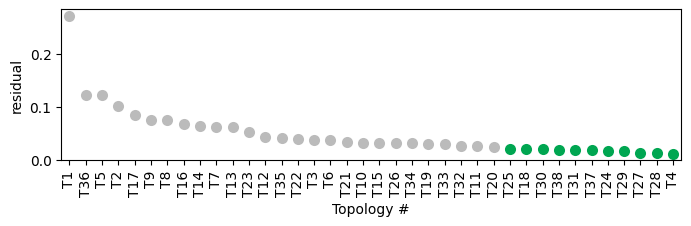

In [13]:
plt.figure(figsize=(8,2), dpi=100)


ax=sns.stripplot(data=df_best, x='Topology_number', y='residual', edgecolor = "white", hue='hit',
size = 8, jitter = 0, zorder = 1, alpha=1, order=list(df_best['Topology_number']), palette=[ingeo_colours[6],'#00A651'])


#plt.grid()  #just add this

plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("residual")
#plt.savefig("residuals.pdf")

In [14]:
df_best = df_best.sort_values('AIC', ascending=False)
df_best['hit'] = 'not hit'
# Set last 5 rows to "hit"
df_best.loc[df_best.tail(5).index, 'hit'] = 'hit'

Text(0, 0.5, 'AIC')

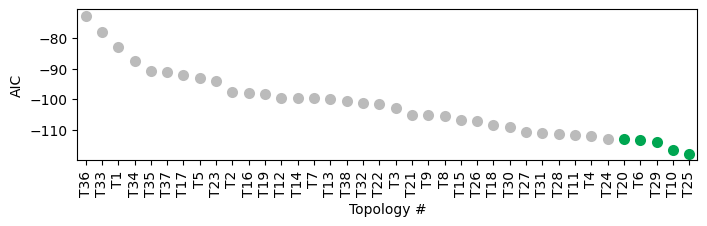

In [15]:
plt.figure(figsize=(8,2), dpi=100)


ax=sns.stripplot(data=df_best, x='Topology_number', y='AIC', edgecolor = "white", hue='hit',
size = 8, jitter = 0, zorder = 1, alpha=1, order=list(df_best['Topology_number']), palette=[ingeo_colours[6],'#00A651'])


#plt.grid()  #just add this

plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("AIC")
#plt.savefig("residuals_AIC.pdf")

In [21]:
df_best = df_best.sort_values('Topology_num')

In [35]:
df_best['Lineage_Convergence'] = 'Y'
df_best.loc[df_best['Topology_num'].isin([1,37,3,2,5,4,8,13,9,10,14]), 'Lineage_Convergence'] = 'N'

In [36]:
df_best

,Topology_Name,Topology_number,residual,hyp,AIC,N_params,Topology_num,hit,Lineage_Convergence
0,Direct_1,T1,0.271049,Direct_1,-83.108294,15,1,not hit,N
1,Direct_2,T2,0.101599,Direct_2,-97.639910,20,2,not hit,N
2,Direct_3,T3,0.036997,Direct_3,-102.894665,30,3,not hit,N
3,Direct_4,T4,0.011604,Direct_4,-111.881931,40,4,not hit,N
4,MEclassic_1,T5,0.122102,MEclassic_1,-93.044269,20,5,not hit,N
5,MEclassic_2,T6,0.036460,MEclassic_2,-113.260057,25,6,hit,Y
6,MEclassic_3,T7,0.062824,MEclassic_3,-99.657454,25,7,not hit,Y
7,MEclassic_4,T8,0.074409,MEclassic_4,-105.426250,20,8,not hit,N
8,MEclassic_5,T9,0.075534,MEclassic_5,-105.051144,20,9,not hit,N
9,MEclassic_6,T10,0.032106,MEclassic_6,-116.439499,25,10,hit,N


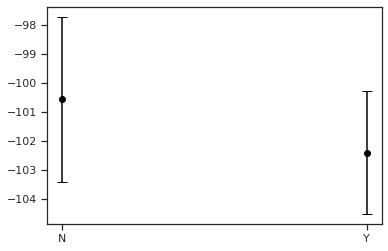

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

subset = df_best

parameter = "Lineage_Convergence"

se_values = subset.groupby(parameter)["AIC"].sem()

# Assuming 'data' is a pandas DataFrame containing your data
# Calculate the standard error for each group
# Calculate means for each group
means = subset.groupby(parameter)["AIC"].mean()

# Add error bars for standard error (SE) at the means
plt.errorbar(means.index, means, yerr=se_values, fmt='o', color='black', capsize=5)


# Show the plot
plt.show()

<ipython-input-42-28f9ff0ef3b6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=subset, y="AIC", x=parameter, order=['N','Y'], palette=['grey','orange'])


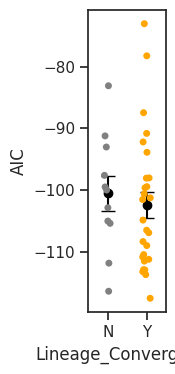

In [42]:
plt.figure(figsize=(1,4), dpi=100)

sns.set_theme(style="ticks")


se_values = subset.groupby(parameter)["AIC"].sem()

# Assuming 'data' is a pandas DataFrame containing your data
# Calculate the standard error for each group
# Calculate means for each group
means = subset.groupby(parameter)["AIC"].mean()

# Add error bars for standard error (SE) at the means
plt.errorbar(means.index, means, yerr=se_values, fmt='o', color='black', capsize=5)


sns.stripplot(data=subset, y="AIC", x=parameter, order=['N','Y'], palette=['grey','orange'])
plt.savefig("Convergence_yes_no.pdf", dpi=1000)

In [29]:
plt.figure(figsize=(1,4), dpi=100)

sns.set_theme(style="ticks")


se_values = subset.groupby(parameter)["AIC_dynamic"].sem()

# Assuming 'data' is a pandas DataFrame containing your data
# Calculate the standard error for each group
# Calculate means for each group
means = subset.groupby(parameter)["AIC_dynamic"].mean()

# Add error bars for standard error (SE) at the means
plt.errorbar(means.index, means, yerr=se_values, fmt='o', color='black', capsize=5)


sns.stripplot(data=subset, y="AIC_dynamic", x=parameter, order=['N','Y'], palette=['grey','orange'])


In [45]:
#df = df.reset_index()
index_2 = list(df.index)

df['index_2'] = index_2

In [46]:
def calculate_aic(rss, num_params, num_observations):
    """
    Calculate AIC based on residual sum of squares (RSS), number of parameters, and number of observations.
    
    :param rss: Residual Sum of Squares (RSS) for the model
    :param num_params: Number of parameters in the model
    :param num_observations: Number of observations (residuals)
    :return: AIC value
    """
    return 2 * num_params + num_observations * np.log(rss / num_observations)


# Group by model hypothesis and calculate AIC for each model
aic_results = []

for i in df['index_2'].unique():  # Loop through unique values in 'index_2'
    df_ = df.loc[df['index_2'] == i]  # Select rows corresponding to the current 'index_2'
    print(i)
    hyp = df_['hyp'].iloc[0]  # Ensure you're accessing the first element
    rss = df_['residual'].values[0]  # Assuming you want the first residual value
    num_observations = 25
    num_params = num_params_dict.get(hyp, None)  # Get number of parameters for the model hypothesis

    if num_params is not None:
        aic_value = calculate_aic(rss, num_params, num_observations)
        aic_results.append({'hyp': hyp, 'AIC': aic_value, 'N_params': num_params})

# Convert results to DataFrame for easy viewing
aic_df = pd.DataFrame(aic_results)


435
53
647
545
817
498
459
165
240
216
564
458
239
456
30
438
973
142
126
45
29
746
167
546
930
8
314
306
835
652
524
664
803
846
940
324
138
184
624
191
4
336
68
393
340
493
323
332
691
78
233
740
271
133
609
536
35
230
245
832
347
162
222
203
964
97
224
650
902
361
261
494
451
560
199
987
764
705
992
749
516
274
390
847
913
855
919
612
852
581
621
130
995
694
602
354
562
112
787
183
620
885
848
477
49
752
237
249
890
10
795
305
518
248
901
96
863
304
200
684
429
841
532
357
327
428
883
251
799
807
922
58
666
218
626
706
207
554
413
588
925
34
385
464
674
665
84
882
95
37
856
656
124
334
198
258
294
15
563
801
120
629
260
619
465
76
632
472
613
407
826
430
667
504
537
46
246
672
771
971
829
714
727
127
460
421
411
607
348
73
353
194
313
886
880
383
107
734
431
44
670
520
627
561
399
565
311
166
857
676
543
3
143
793
936
580
85
467
26
786
337
321
525
154
648
928
386
242
587
630
950
701
499
849
432
521
98
723
622
111
570
712
495
541
522
785
214
64
974
156
481
711
482
748
636
129
538
439

In [48]:
aic_results

[{'hyp': 'MultipleM_4', 'AIC': -73.03894838037598, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03724012690836, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03706653420846, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03706042818538, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03679621017767, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03677985743008, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03516353326884, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.0350113775913, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03444942160922, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03419431451391, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03402083784201, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03396374862757, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03369816435998, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03361287755064, 'N_params': 30},
 {'hyp': 'MultipleM_4', 'AIC': -73.03332639067636

In [47]:
aic_df

,hyp,AIC,N_params
0,MultipleM_4,-73.038948,30
1,MultipleM_4,-73.037240,30
2,MultipleM_4,-73.037067,30
3,MultipleM_4,-73.037060,30
4,MultipleM_4,-73.036796,30
...,...,...,...
995,MultipleM_4,-62.179601,30
996,MultipleM_4,-61.516939,30
997,MultipleM_4,-61.488931,30
998,MultipleM_4,-61.432196,30


In [20]:
topo_ = [hypo_.loc[hypo_['Topology_Name']==i]['Topology_number'] for i in aic_df.hyp]

def flatten(xss):
    return [x for xs in xss for x in xs]

aic_df['Topology_number'] = flatten(topo_)

In [23]:
aic_df

,hyp,AIC,N_params,Topology_number
0,MultipleM_4,-73.038948,30,T40
1,MultipleM_4,-73.037240,30,T40
2,MultipleM_4,-73.037067,30,T40
3,MultipleM_4,-73.037060,30,T40
4,MultipleM_4,-73.036796,30,T40
...,...,...,...,...
995,MultipleM_4,-62.179601,30,T40
996,MultipleM_4,-61.516939,30,T40
997,MultipleM_4,-61.488931,30,T40
998,MultipleM_4,-61.432196,30,T40


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


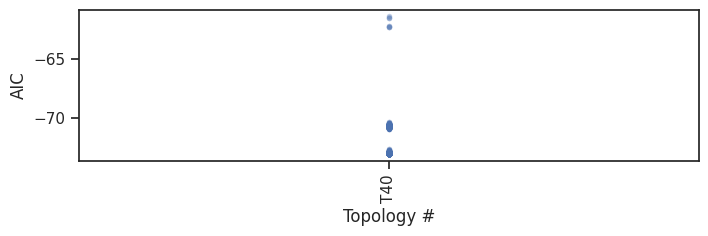

In [24]:
plt.figure(figsize=(8,2), dpi=100)


sns.set_theme(style="ticks")

ax=sns.stripplot(data=aic_df, x='Topology_number', y='AIC', edgecolor = "white",
size = 4, jitter = 0, zorder = 1, alpha=0.3, order=list(df_best['Topology_number']))

plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("AIC")

plt.savefig("residuals_AIC_1000.png", dpi=1000)

In [22]:
#plt.figure(figsize=(8,2), dpi=100)


#sns.set_theme(style="ticks")
## Stripplot and Boxplot


#ax=sns.stripplot(data=df, x='Topology_number', y='residual', edgecolor = "white",
#size = 4, jitter = 0, zorder = 1, alpha=0.3).set(yscale="log")

In [23]:
aic_df

,hyp,AIC,N_params,Topology_number
0,MultipleM_4,-73.038948,30,T40
1,MultipleM_4,-73.037240,30,T40
2,MultipleM_4,-73.037067,30,T40
3,MultipleM_4,-73.037060,30,T40
4,MultipleM_4,-73.036796,30,T40
...,...,...,...,...
995,MultipleM_4,-62.179601,30,T40
996,MultipleM_4,-61.516939,30,T40
997,MultipleM_4,-61.488931,30,T40
998,MultipleM_4,-61.432196,30,T40


In [24]:
df_best = df_best.reset_index()

In [25]:
cost_dynamic_list = list()

for s in range(0, len(df_best.hyp)):
    print(s)
    sim = df_best.loc[df_best.index == s]
    sim = sim.reset_index()
    sim_name = sim.hyp

    
    path = glob.glob(os.path.join('results', sim_name[0], '*',f'{sim_name[0]}_fit_full'))
    file = open(path[0], 'rb')
    # dump information to that file
    markov_fit = pickle.load(file)
    

    
    chosen_initialisation_index = sim.level_0[0]
    sP = markov_fit.sP_opts[chosen_initialisation_index]

    _signalling_parameters = sP.reshape(5,-1)
    signalling_parameters = np.zeros((5,_signalling_parameters.shape[1]))
    signalling_parameters[:3] = _signalling_parameters[:3]
    signalling_parameters[4] = _signalling_parameters[3]
    mrkvS = markov_fit.mrkvSs[chosen_initialisation_index]
    mrkvS.signalling_parameters = signalling_parameters
    mrkvS.make_transition_matrices()
    mrkvS.make_transition_matrices_dynamic()

    mrkvS.simulate()
    mrkvS.simulate_dynamic()
    
    s_solve_dynamic = mrkvS.s_solve_dynamic.reshape(mrkvS.s_solve_dynamic.shape[0],mrkvS.D_init.shape[0],-1)
    s_solve = mrkvS.s_solve.reshape(mrkvS.s_solve.shape[0],mrkvS.D.shape[0],-1)

    total_proportions = {}
    for data_name in markov_fit.data_names:
        total_proportions[data_name] = np.zeros_like(mrkvS.final_vals[0])
    for state_name in markov_fit.state_names:
        total_proportions[markov_fit.dictionary[state_name]] += mrkvS.final_vals[mrkvS.markov.states.index(state_name)]

    total_proportions_dynamic = {}
    for data_name in markov_fit.data_names:
        total_proportions_dynamic[data_name] = np.zeros_like(mrkvS.final_vals_dynamic[0])
    for state_name in markov_fit.state_names:
        total_proportions_dynamic[markov_fit.dictionary[state_name]] += mrkvS.final_vals_dynamic[
            mrkvS.markov.states.index(state_name)]

    cost_dynamic = 0
    for key, val in total_proportions_dynamic.items():
        cost_dynamic += (np.abs(val - markov_fit.df_dynamic[key].values / 100) ** 2).sum()

    cost_dynamic_list.append(cost_dynamic)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [26]:
df_best['residual_dynamic'] = cost_dynamic_list

In [27]:
order = df_best.sort_values('residual_dynamic')['Topology_number']
df_best = df_best.sort_values('residual_dynamic', ascending=False)
df_best = df_best.reset_index()
df_best_hit = df_best.loc[df_best['hit']=='hit']

<ipython-input-28-770110f1ebd7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.stripplot(data=df_best_hit, x='Topology_number', y='residual_dynamic' , size = 8,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'residual')

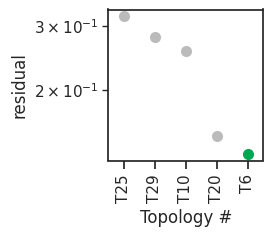

In [28]:

plt.figure(figsize=(2,2), dpi=100)


sns.set_theme(style="ticks")
## Stripplot and Boxplot

ax=sns.stripplot(data=df_best_hit, x='Topology_number', y='residual_dynamic' , size = 8, 
                palette=[ingeo_colours[6],ingeo_colours[6],ingeo_colours[6],ingeo_colours[6],'#00A651']).set(yscale="log")

plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("residual")

In [29]:
def calculate_aic(rss, num_params, num_observations):
    """
    Calculate AIC based on residual sum of squares (RSS), number of parameters, and number of observations.
    
    :param rss: Residual Sum of Squares (RSS) for the model
    :param num_params: Number of parameters in the model
    :param num_observations: Number of observations (residuals)
    :return: AIC value
    """
    return 2 * num_params + num_observations * np.log(rss / num_observations)


# Group by model hypothesis and calculate AIC for each model
aic_results = []

for hyp, group in df_best.groupby('hyp'):
    rss = group['residual_dynamic'].values
    num_observations = 33
    num_params = num_params_dict.get(hyp, None)  # Get number of parameters for the model hypothesis

    if num_params is not None:
        aic_value = calculate_aic(rss, num_params, num_observations)
        aic_results.append({'Topology_Name': hyp, 'AIC_dynamic': aic_value[0], 'N_params': num_params})

# Convert results to DataFrame for easy viewing
aic_df_dynamic = pd.DataFrame(aic_results)

In [30]:
df_best = df_best.merge(aic_df_dynamic, on='Topology_Name', how='left')
df_best = df_best.sort_values(["AIC_dynamic"], ascending=False)

In [31]:
df_best_hit = df_best.loc[df_best['hit']=='hit']

In [32]:
df_best_hit

,level_0,index,Topology_Name,Topology_number,residual,hyp,AIC,N_params_x,Topology_num,hit,residual_dynamic,AIC_dynamic,N_params_y
10,35,28,MEandDirect_15,T29,0.016068,MEandDirect_15,-113.745462,35,29,hit,0.279339,-87.470640,35
6,37,24,MEandDirect_11,T25,0.020564,MEandDirect_11,-117.577486,30,25,hit,0.317879,-93.205524,30
11,36,9,MEclassic_6,T10,0.032106,MEclassic_6,-116.439499,25,10,hit,0.254600,-110.530745,25
27,33,19,MEandDirect_6,T20,0.024712,MEandDirect_6,-112.983844,30,20,hit,0.149175,-118.171758,30
30,34,5,MEclassic_2,T6,0.036460,MEclassic_2,-113.260057,25,6,hit,0.133269,-131.892357,25


<ipython-input-43-3006df7e191c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.stripplot(data=df_best_hit, x='Topology_number', y='AIC_dynamic' , size = 12,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


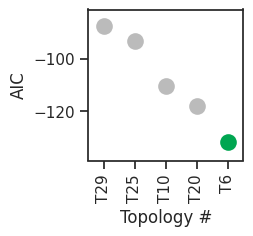

In [43]:
plt.figure(figsize=(2,2), dpi=100)


sns.set_theme(style="ticks")
## Stripplot and Boxplot

ax=sns.stripplot(data=df_best_hit, x='Topology_number', y='AIC_dynamic' , size = 12, 
                palette=[ingeo_colours[6],ingeo_colours[6],ingeo_colours[6],ingeo_colours[6],'#00A651']).set(ylim=(-139,-81))
plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("AIC")
plt.savefig("AIC_VALIDATE.pdf")